# Exercício Prático 01 - Calibração da câmera


- Nome: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
# Usado para exibir imagens no próprio notebook
from IPython.display import Image

## 1) Calibração robusta (utilizando o MATLAB)

- Número de imagens retiradas: 10
- Tamanho em milímetros dos quadradinhos: 26x26
- O restante das imagens das estimações das poses da câmera estão na pasta results.

### Exemplo de um procedimento de corner extraction

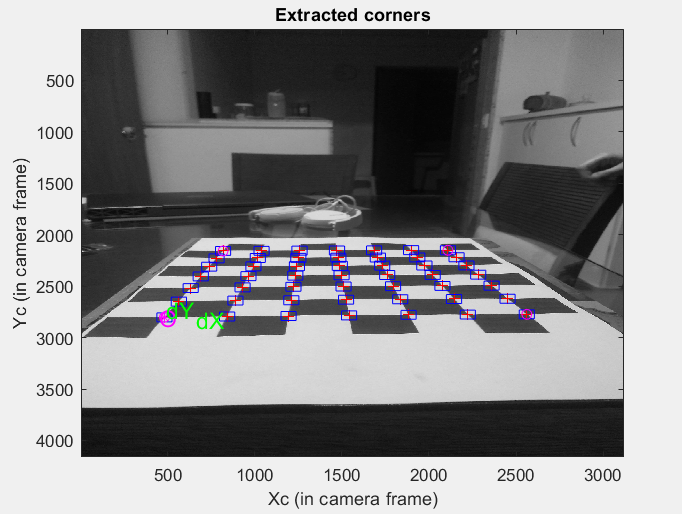

In [2]:
Image('results/corner_extraction.png')

### Estimações das poses da câmera

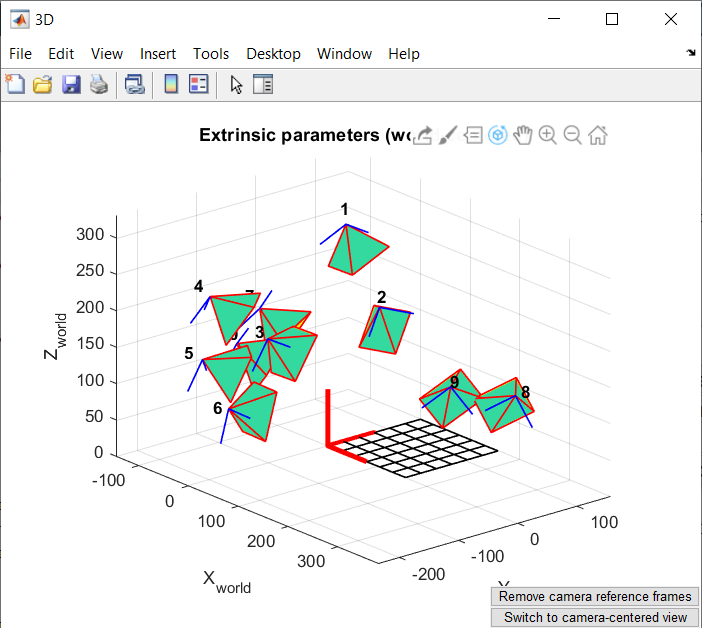

In [3]:
Image('results/extrinsic1.png')

### Resultado dos parâmetros intrínsicos estimados

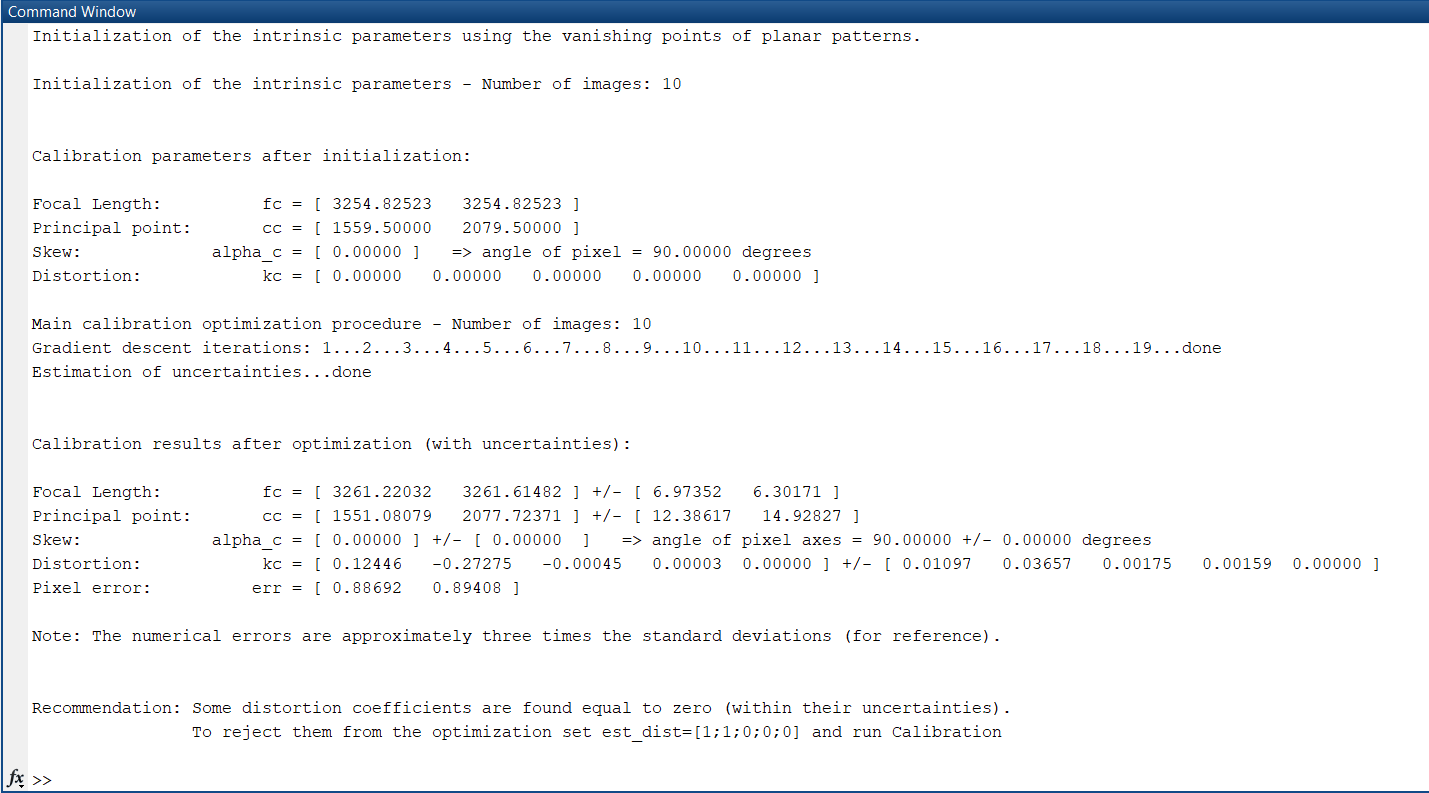

In [4]:
Image('results/parameters.png')

## 2) Calibração simples (manual)
### 2.1) Passo a passo

- __Materiais utilizados:__ 
    - Régua.
    - Livro (de capa dura).
    - Um celular com câmera. <br><br>
- __Procedimento:__
    - Apoiando o livro na vertical, iremos centralizar a imagem com o centro do livro, fazendo com que o eixo Z fure o livro bem no seu centro.
    - Tentaremos ao máximo fazer com que as bordas do livro estejam paralelas com as bordas da imagem. 
    - Após tirar a foto, mediremos a distância do livro até a câmera.
    - Usaremos as equações $\frac{(dx * dZ)}{dX}$ e $\frac{(dy * dZ)}{dY}$ para calcular respectivamente $f_x$ e $f_y$, onde $dx$ e $dy$ correspondem a largura e altura em pixels do livro na imagem; $dX$ e $dY$ correspondem a largura e altura do livro em milímetros; e, por fim, $dZ$ corresponde à distância do livro até a câmera em milímetros.

### 2.3) Resultados obtidos

- No meu caso, os valores das variáveis eram $dx = 1907$ pixels, $dy = 2682$ pixels, $dX = 153$ mm, $dY = 217$ mm, e $dZ = 261.5$ mm. (Os valores de dx e dy foram medidos "à mão", tentando capturar os pontos de interesse e fazendo a diferença, por exemplo: $dx = x_f - x_i$).
- O tamanho da imagem original é 3120x4160 pixels. Ou seja, $cols = largura = 3120$ e $rows = altura = 4160$.<br><br>
- Conseguimos obter os valores $f_x = 3259.349673202614$ e $f_y = 3231.9953917050693$, em pixels.
- Sabendo que 1 pixel $\approx$ 0.2645833333 milímetros, temos que: $f_x = 862.36960103$ e $f_y = 855.13211406$, em milímetros.
<br><br>
- Matriz de parâmetros intrínsicos (considerando que o nosso pixel é quadrado, de dimensões 1x1):<br><br>

$$
M_{int} =
\begin{bmatrix}
f_x & 0 & \frac{cols}{2} \\
0 & f_y & \frac{rows}{2} \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
3259.34967 & 0 & \frac{3120}{2} \\
0 & 3231.99539 & \frac{4160}{2} \\
0 & 0 & 1
\end{bmatrix}
$$

<br><br>
- Matriz de parâmetros extrínsicos:<br><br>
$$
M_{ext} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$
    

### 2.4) Algumas observações

- Conseguimos notar uma diferença nas medidas feitas manualmente e pelo MATLAB (o que é esperado).
- Possivelmente, o eixo Z não estava furando perfeitamente o centro do livro. Isso fica mais evidente na diferença vista entre os valores calculados para $f_y$. 
- Creio que também, por utilizar 10 imagens, o MATLAB teve mais informações e mais precisão para estimar a distância focal da câmera. Isso fica mais evidente na diferença suave entre os valores calculados para $f_x$.

## 3) Metadados

- __OBS.:__ Não foi encontrado o tamanho do pixel da câmera. Sendo assim, não consegui converter os valores e verificar se batem com os cálculos feitos.

### 3.1) Da imagem

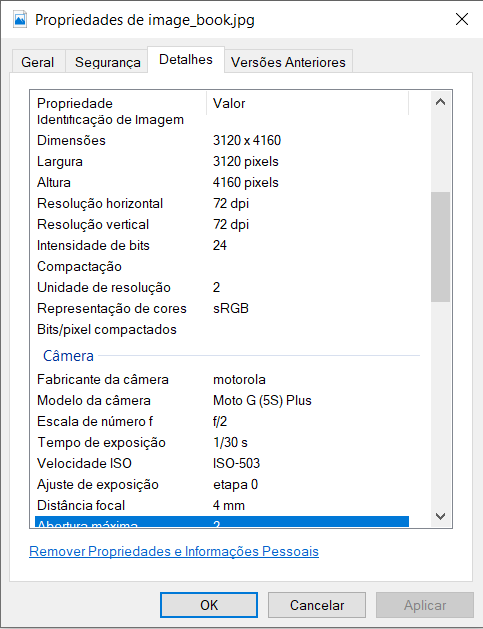

In [5]:
Image('results/metadados1.png')

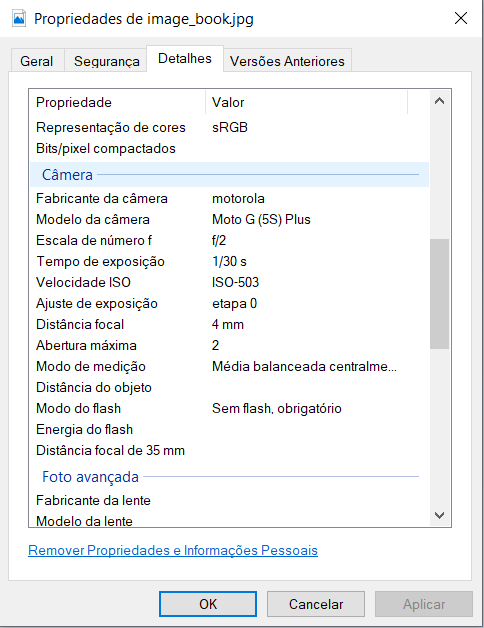

In [6]:
Image('results/metadados2.png')

### 3.2) Especificações retiradas do site https://www.gsmarena.com/motorola_moto_g5_plus-8453.php

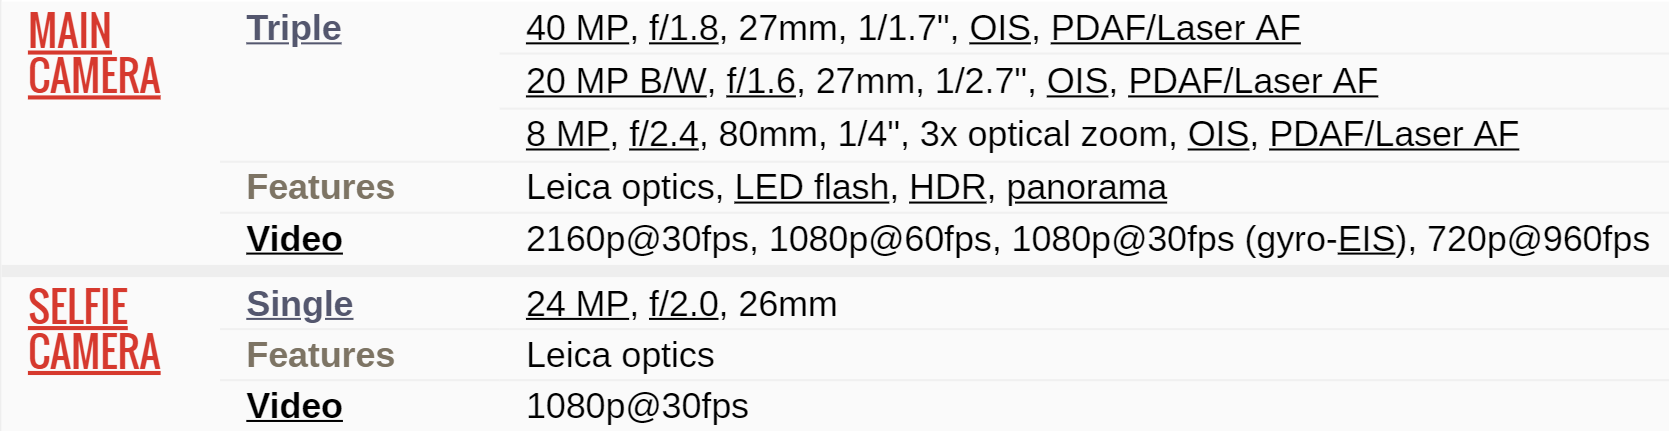

In [7]:
Image('results/datasheet.png')